<a href="https://www.kaggle.com/code/riazahmedtamimansari/notebookd524c8297c?scriptVersionId=107058193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-popular-movies-dataset/n_movies.csv


The count of indexes and names of columns present
RangeIndex(start=0, stop=9957, step=1)
Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')
The number of Null values in the year column is 527
Total number of films released in a year
As seen from the below graph, we can find the number of movies increased significantly only from 2013
object
1408
Top 5 movies by duration arranged in descending order
                           title  year certificate duration
943              The Vietnam War  2017       TV-MA  990 min
5834        Johan Falk: Lockdown  2015       TV-14   99 min
6549             The Whole Truth  2009       TV-MA   99 min
3549  The Bloodstained Butterfly  1971   Not Rated   99 min
2786               Hard Breakers  2010           R   99 min
Top 5 movies by duration with the certificate = TV-MA arranged in descending order
                title  year certificate duration
943   The Vietnam War  20

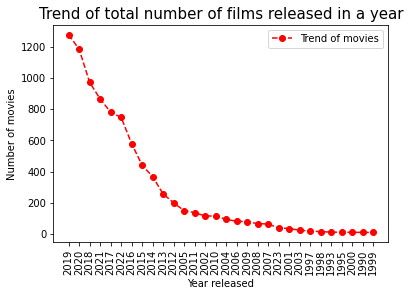

In [2]:
    #Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored
    #Read the file and load in a dataframe
df=pd.read_csv("../input/netflix-popular-movies-dataset/n_movies.csv")
    #Inspect the dataframe indexes and columns
print(colored("The count of indexes and names of columns present",'red',attrs=['bold','underline']))
print(df.index)
print(df.columns)
    #We are going to find out the total films released per year.  So chose the year column to drop the values with NaN 
    #Found 527 null values in year column. Need to drop the rows.
print(colored("The number of Null values in the year column is",'red',attrs=['bold','underline']), df['year'].isna().sum())
df.dropna(subset = ['year'],inplace=True)
    #For the missing values in certificate, I have used the backfill method to fill up.
df['certificate']=df['certificate'].fillna(method='backfill')
    #The year columns contains data like "2014-1015" Goal is to get the first mentioned year in the year column and strip the hyphen and the following characters.  
df['year']=df['year'].str[1:5]
    #Delete the non numerical values in the year column.For eg, we just need the numerical years like 2019, but not XXII.
df = df[df['year'].str.contains('\\d',regex=True)]
print("Total number of films released in a year")
        #Total number of films released in a year
df_count_of_films=df['year'].value_counts()
df_count_5 = df_count_of_films.head(30)
plt.plot(df_count_5.index,df_count_5.values,marker='o', linestyle='dashed',color='r',label='Trend of movies')
plt.title("Trend of total number of films released in a year",fontsize=15)
plt.xlabel("Year released")
plt.ylabel("Number of movies")
plt.xticks(rotation=90)
plt.legend()
print(colored("As seen from the below graph, we can find the number of movies increased significantly only from 2013", 'red',attrs=['bold','dark','underline']))
    #Sort the dataset by the duration of the movie in descending order and get the top 10 longest movies
print(df['duration'].dtype)
print(df['duration'].isna().sum())
print(colored("Top 5 movies by duration arranged in descending order", 'red',attrs=['bold','dark','underline']))
df.sort_values(['duration'], ascending=False, inplace=True)
print(df[['title','year','certificate','duration']].head(5))
    #Get the top 5 longest movie only for the certificate "TV-MA"
print(colored("Top 5 movies by duration with the certificate = TV-MA arranged in descending order", 'red',attrs=['bold','dark','underline']))
print(df[df['certificate'] == 'TV-MA'][['title','year','certificate','duration']].head(5))
    #Among the top 10 longest movie only for the certificate "TV-MA" choose the ones with the rating of 4.4 and year released in 2019 and 2021.
print(colored("Top 10 longest movie only for the certificate TV-MA choose the ones with the rating of 4.4 and year released in 2019 and 2021", 'red',attrs=['bold','dark','underline']))
print(df[df['certificate'] == 'TV-MA'][['title','year','certificate','duration','rating']].head(10).set_index(['year','rating']).loc[['2021','2019']])

    #Find the genre only in 'Comedy','Drama' out of the various categories
print(colored("In the entire list find only the movies with genre in Comedy & Drama", 'red',attrs=['bold','dark','underline']))
listy=list(map(lambda x: x in ['Comedy, Drama'],df['genre']))
print(df[listy][['genre','title','year','certificate','duration']])

    #Introduce a recommendation column to watch movies if the rating is more than 5.  Before that fill the rating column consisting of NaN with 0.
df['rating'] = df['rating'].fillna(0)
print(colored("Introduce a recommendation column to watch or skip based on the rating > than 5", 'red',attrs=['bold','dark','underline']))
df['recommendation'] = df['rating'].apply(lambda x:"Worth Watching" if x > 5 else "skip")
print(df[['title','year','certificate','duration','recommendation']].head(10))







As seen from the below graph, we can find the most of the movies had rating between 6 and 8


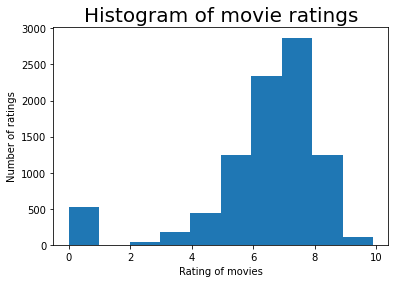

In [3]:
    #Plotting a histogram for ratings column
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['rating'],bins=10)
plt.xlabel('Rating of movies')
plt.ylabel('Number of ratings')
plt.title("Histogram of movie ratings",fontsize=20)
print(colored("As seen from the below graph, we can find the most of the movies had rating between 6 and 8", 'red',attrs=['bold','dark','underline']))




Text(0, 0.5, 'Count of movies')

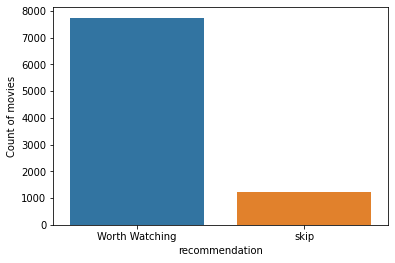

In [4]:
    #Out of the total movies, the recommendable movies are comparably higher than the skipped ones.

sns.countplot(x=df['recommendation'])
plt.ylabel("Count of movies")



